In [1]:
"""
    Author : Teaching Assistants of LELEC210X - UCLouvain
    Date : 21/11/2023

    Code description :
    __________________
    Automatically write a chosen audio signal as float array in c file.

"""

import os
import pickle
from shutil import copyfile

import librosa  # For audio signal computations as MFCC
import matplotlib.pyplot as plt
import numpy as np
import sounddevice as sd
import soundfile as sf
from scipy import signal

from classification.datasets import Dataset, get_cls_from_path
from classification.utils.audio import AudioUtil

# from classification.utils.DL_model import *
from classification.utils.utils import (
    eval_model,
    fixed_to_binary,
    flatten,
    float2fixed,
    load_model,
)

# import torch

In [2]:
dataset = Dataset()
classnames = dataset.list_classes()

print("\n".join(classnames))

birds
chainsaw
fire
handsaw
helicopter


Playing and showing data for :  fire_0


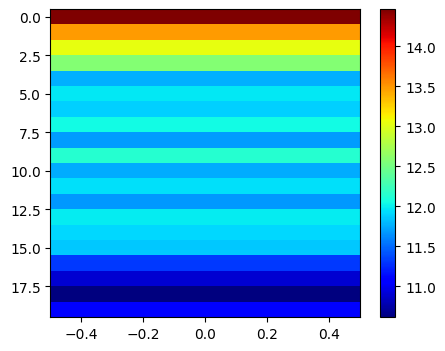

14.465362322100686


In [3]:
audiotype = "real"  # else sine example

if audiotype == "real":
    Nft = 512  # Number of frequency bins
    fs2 = 11025  # Sampling frequency

    sound = dataset["fire", 0]
    print("Playing and showing data for : ", dataset.__getname__(["fire", 0]))
    audio, fs = AudioUtil.open(sound)
else:
    fsinus = 250  # frequency of the sinusoid
    t = np.arange(11025 * 5) / 11025  # time instants
    audio = np.sin(2 * np.pi * fsinus * t)
    # audio = np.cos(2*np.pi*2*np.arange(L2)/L2) + np.cos(2*np.pi*5*np.arange(L2)/L2)

audio2, _ = AudioUtil.resample((audio, fs), fs2)
audio2, _ = AudioUtil.pad_trunc((audio2, fs2), 50)
audio2 /= np.max(np.abs(audio2))
L2 = len(audio2)

melspec = AudioUtil.melspectrogram((audio2, fs2))
# melspec/=1024  #Scaling factor induced by embedded computations is corrected here

"Play audio"
audio_played = AudioUtil.normalize((audio2, fs2), target_dB=30)
AudioUtil.play(audio_played)

plt.figure(figsize=(5, 4))
plt.imshow(melspec, aspect="auto", cmap="jet")
plt.colorbar()
plt.show()

print(np.max(melspec))  # sometimes used for colorbar in DL_prediction_uart.py

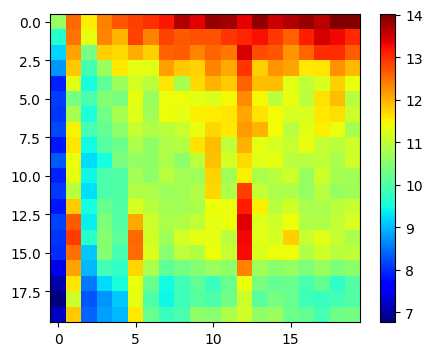

In [9]:
audio3, _ = AudioUtil.resample((audio, fs), fs2)
audio3, _ = AudioUtil.pad_trunc((audio3, fs2), 950)
audio3 /= np.max(np.abs(audio3))

melspec3 = AudioUtil.melspectrogram((audio3, fs2))

plt.figure(figsize=(5, 4))
plt.imshow(melspec3, aspect="auto", cmap="jet")
plt.colorbar()
plt.show()

### Check model prediction on this audio signal

In [26]:
model_dir = "../data/models/"  # where to save the models
pca = pickle.load(open(model_dir + "pca.pickle", "rb"))
model_knn = pickle.load(open(model_dir + "KNN.pickle", "rb"))

thisfv = pca.transform(melspec3.reshape(-1, 1).T)
mat = np.zeros((2, thisfv.shape[1]))
mat[0] = thisfv[0]

prediction_knn = model_knn.predict(mat)
print("Class predicted by KNN:", prediction_knn[0])

Class predicted by KNN: handsaw


## Choose signal encoding format

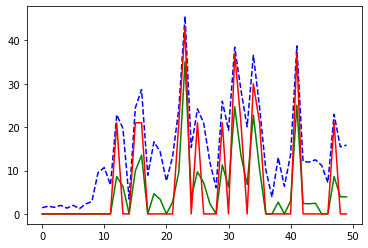

In [403]:
lo = 0
up = 50

# print(np.max(np.abs(sim))*2**6)
# print(np.abs(2476+3031j))
tmp0 = sim * 2**6
tmp0 = np.real(tmp0).astype(int) + 1j * np.imag(tmp0).astype(int)
tmp = tmp0 * 2**15 / np.max(np.abs(tmp0))
tmp2 = np.real(tmp).astype(int) + 1j * np.imag(tmp).astype(int)
# print(tmp2)

# plt.figure()
# plt.plot(tmp2[lo:up], 'b')
# plt.plot(np.array(tst[lo:up])*2**9, 'r')
# # plt.yscale('log')
# plt.show()

tmp3 = np.abs(tmp2) ** 2 / 2**15
# tmp4 = np.imag(tmp2)**2/2**15

tmp3[tmp3 < 1] = 0
# tmp4[tmp4<1]=0

# tmp5 = tmp3+tmp4*1j

plt.figure()
plt.plot(tmp3[lo:up] * 2, "g")
plt.plot(np.abs(sim)[lo:up] * 2**5, "b--")
plt.plot(np.abs(tmpa)[lo:up], "r")
# plt.yscale('log')
plt.show()

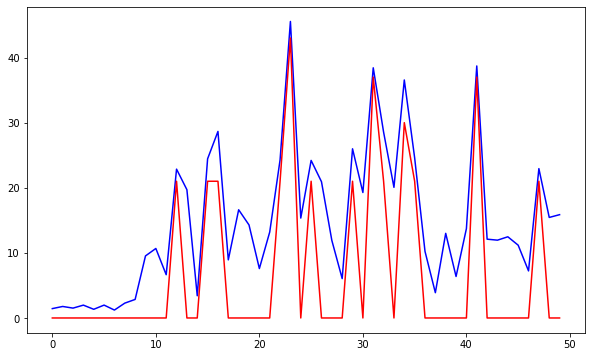

3914.1727140894545
125184
353
159


In [343]:
sim = np.fft.fft(audio2[:512] * np.hamming(512))
lo = 0
up = 50

# plt.figure(figsize=(10,6))
# plt.plot(np.real(sim)[lo:up], 'b')
# plt.plot(np.real(tmp)[lo:up],'r--')
# plt.show()

# plt.figure(figsize=(10,6))
# plt.plot(np.imag(sim)[lo:up], 'b')
# plt.plot(np.imag(tmp)[lo:up],'r--')
# plt.show()

plt.figure(figsize=(10, 6))
plt.plot(np.abs(sim)[lo:up] * 2**5, "b")
plt.plot(np.abs(tmpa)[lo:up], "r")
# plt.yscale('log')
plt.show()

print(np.max(np.abs(sim) * 2 ** (16 - 1 - 9)))
print(np.max(np.abs(tmpa) * 2 ** (16 - 1 - 9)))

print(np.argmax(np.abs(sim) * 2 ** (16 - 1 - 9)))
print(np.argmax(np.abs(tmpa) * 2 ** (16 - 1 - 9)))

In [263]:
print(np.linalg.norm(np.abs(sim) * 2**5))
print(np.linalg.norm(np.abs(tmpa)))

4060.450342661095
2862.30903293128


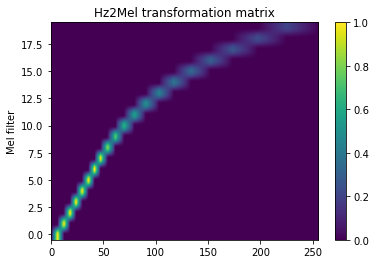

height = 20, width = 256


In [76]:
Nft = 512
# Nft=32
fs = 11025  # Hz
n_mels = 20
# n_mels = 10

"Using librosa library"
plt.figure()
mel = librosa.filters.mel(sr=fs, n_fft=Nft, n_mels=n_mels)
mel = mel[:, :-1]

"Normalization"
mel = mel / np.max(mel)

plt.imshow(mel, aspect="auto")
plt.gca().invert_yaxis()
plt.ylabel("Mel filter")
plt.colorbar()
plt.title("Hz2Mel transformation matrix")
plt.show()

H, W = mel.shape
print(f"height = {H}, width = {W}")

"Option"
hardcoded_format = "q15"  #'q15'#'q31' #'float32'

mel_q15 = float2fixed(mel, 1)
mel_q31 = float2fixed(mel, 1, q=31)

# print(mel_q15[0,:10])
# print(mel_q31[0,:10])

if hardcoded_format == "q15":
    mat = mel_q15
    zero = str(0)
elif hardcoded_format == "q31":
    mat = mel_q31
    zero = str(0)
else:
    mat = mel
    zero = str(0.0)

hardcoded_type = "real"  #'real', 'complex'
if hardcoded_type == "real":
    width = W
elif hardcoded_type == "complex":
    width = 2 * W

In [56]:
"Option"
hardcoded_format = "q15"  #'q15'#'q31' #'float32'

audio_q15 = float2fixed(audio2, 1)
audio_q31 = float2fixed(audio2, 1, q=31)

# print(audio_q15[:10])
# print(audio_q31[:10])

if hardcoded_format == "q15":
    sig = audio_q15
elif hardcoded_format == "q31":
    sig = audio_q31
else:
    sig = audio2

## Open file and write content in it

In [57]:
# Declare array variable
header = os.path.join(os.path.dirname(os.getcwd()), r"Embedded\UART_Printf\Inc\audio.h")
fh = open(header, "a")
fh.truncate(0)  # Clear file content
fh.write('#include "arm_math.h" \n')
# Make space
for i in range(1):
    fh.write("\n")
fh.write(
    "extern "
    + hardcoded_format
    + "_t audiosignal["
    + str(L2)
    + "];  /* Declaration of the variable */"
)
fh.close()

path = os.path.join(
    os.path.dirname(os.getcwd()),
    r"Embedded\\UART_Printf\STM32CubeIDE\Application\User\\",
)
temp = path + r"temp.c"
filename = path + r"audio.c"
f2 = open(temp, "a")
f = open(filename)
f2.truncate(0)  # Clear file content

# Copy and paste describing text of the file
count = 0
line = f.readline()
f2.write(line)
while line != "/* END */\n" and count != 30:
    print(count, line)
    line = f.readline()
    f2.write(line)
    count += 1

# Make space
for i in range(1):
    f2.write("\n")

# Include declared extern variable
f2.write('#include "audio.h"  /* Declaration made available here */ \n')
f2.write('#include "arm_math.h" \n')

# Make space
for i in range(2):
    f2.write("\n")

f2.write("/* Variable defined here */ \n")
f2.write(hardcoded_format + "_t audiosignal[" + str(L2) + "] = {")

for elem in sig[:-1]:
    f2.write(str(elem) + ", \n")
f2.write(str(sig[-1]) + " \n")
f2.write("};")

f.close()
f2.close()
copyfile(temp, filename)
os.remove(temp)

0 /**

1   ******************************************************************************

2   * @file    UART/UART_Printf/Src/audio.c

3   * @author  Olivier Leblanc

4   * @brief   This example shows how to retarget the C library printf function

5   *          to the UART.

6   ******************************************************************************

7 */



## Hardcode in mcu project

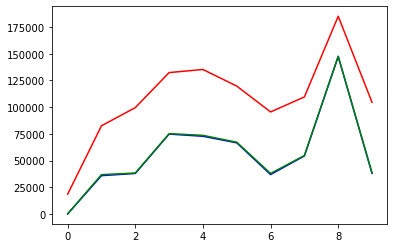

In [255]:
lo = 0
up = 10

tmp = [
    0.000000,
    1.093750,
    1.156250,
    2.281250,
    2.218750,
    2.031250,
    1.125000,
    1.656250,
    4.500000,
    1.156250,
    0.625000,
    0.562500,
    0.375000,
    0.500000,
    0.156250,
    1.875000,
    38.937500,
    14.687500,
    1.093750,
]

np.fft.fft(audio2[:512] * np.hamming(512))
test = mat @ np.abs(sim[:256])
test2 = mat @ tmpa[:256] / 256

plt.figure()
plt.plot(np.array(tmp)[lo:up] * 2**15, "b")
plt.plot(test[lo:up], "r")
plt.plot(test2[lo:up] * 8, "g")
# plt.yscale('log')
plt.show()

In [ ]:
path = (
    r"C:\Users\leblanco.OASIS\Documents\IngeCivilPHD\Teaching\LELEC2103\mcu\Core\Inc\\"
)
temp = path + r"temp.h"
filename = path + r"spectrogram_dbg.h"
f2 = open(temp, "a")
f = open(filename)
f2.truncate(0)  # Clear file content

# Copy and paste describing text of the file
count = 0
line = f.readline()
f2.write(line)
while count < 8:
    print(count, line)
    line = f.readline()
    f2.write(line)
    count += 1

# Make space
for i in range(1):
    f2.write("\n")

f2.write(hardcoded_format + "_t audiosignal[" + str(Lcut) + "] = {")

for elem in sig[:-1]:
    f2.write(str(elem) + ", \n")
f2.write(str(sig[-1]) + " \n")
f2.write("};")

# Make space
for i in range(2):
    f2.write("\n")

f2.write("q15_t *audiosignal_dbg = audiosignal; \n\n")
f2.write("#endif /* INC_SPECTROGRAM_DBG_H_ */")

f.close()
f2.close()
copyfile(temp, filename)
os.remove(temp)

0 /*

1  * spectrogram_dbg.h

2  *

3  *  Created on: Jun 4, 2021

4  *      Author: math

5  */

6 

7 #ifndef INC_SPECTROGRAM_DBG_H_

